In [1]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
%matplotlib inline

# Загружаем датасет

In [2]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

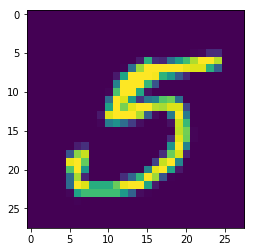

In [3]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][1].reshape(28,28))

In [4]:
train.keys()

dict_keys(['data', 'labels'])

# Обучаем модель

In [75]:
# Реализуйте здесь обучение модели
np.random.seed(12)

X = train['data']
y = train['labels']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)
x_train = x_train/255
x_test = x_test/255

y[y==5] = -1
y[y==6] = 1



In [76]:
print(np.max(x_train),np.min(x_train), np.mean(x_train))

1.0 0.0 0.13358847046281205


In [77]:
def logloss(X, y, w):
    loss = np.sum(np.log(1 + np.exp(-y*np.dot(X,w))))
    return(loss/X.shape[0])

def predict_probability(X, w):
    return (1. / (1. + np.exp(-np.dot(X,w))))

def predict_class_binary(X, w, th = 0.5):
    prediction = predict_probability(X, w)
    prediction[prediction >= th] = 1
    prediction[prediction < th] = -1
    return prediction

In [92]:
#w = np.random.normal(scale=0.001, size = x_train.shape[1])
#w = np.random.uniform(low=-np.sqrt(6)/np.sqrt(784), high=np.sqrt(6)/np.sqrt(784), size = x_train.shape[1])
#w = np.random.uniform(low=-0.001, high=0.001, size = x_train.shape[1])
w = np.random.normal(scale=1, size = x_train.shape[1])*np.sqrt(2/785)
n = 0.1
logloss_tr = []
logloss_test = []
acc_tr = []
acc_test = []
for epoch in tqdm.tqdm_notebook(range(15), desc = 'Progress bar'):
    for it in tqdm.tqdm_notebook(range(x_train.shape[0]), desc=str(epoch+1)+' epoch'):
        j = np.random.randint(0, x_train.shape[0])
        
        grad = - y_train[j] * x_train[j]/( 1 + np.exp( y_train[j] * np.dot(w.T, x_train[j]) ) ) + .0001 * w
        w = w - 0.01 * grad
    n = n*0.9
    logloss_tr.append(logloss(x_train,y_train,w))
    logloss_test.append(logloss(x_test,y_test,w))
    acc_tr.append(accuracy_score(y_train, predict_class_binary(x_train, w)))
    acc_test.append(accuracy_score(y_test, predict_class_binary(x_test, w)))
    print('accuracy:', acc_tr[-1], 'val_acc:', acc_test[-1])
    

A Jupyter Widget

A Jupyter Widget

accuracy: 0.9746268656716418 val_acc: 0.9745454545454545


A Jupyter Widget

accuracy: 0.9776119402985075 val_acc: 0.9748484848484849


A Jupyter Widget

accuracy: 0.9782089552238806 val_acc: 0.9760606060606061


A Jupyter Widget

accuracy: 0.9807462686567164 val_acc: 0.9766666666666667


A Jupyter Widget

accuracy: 0.9805970149253731 val_acc: 0.9763636363636363


A Jupyter Widget

accuracy: 0.9819402985074627 val_acc: 0.9778787878787879


A Jupyter Widget

accuracy: 0.9819402985074627 val_acc: 0.9790909090909091


A Jupyter Widget

accuracy: 0.9834328358208955 val_acc: 0.98


A Jupyter Widget

accuracy: 0.9816417910447761 val_acc: 0.9772727272727273


A Jupyter Widget

accuracy: 0.9838805970149254 val_acc: 0.9784848484848485


A Jupyter Widget

accuracy: 0.9840298507462687 val_acc: 0.9781818181818182


A Jupyter Widget

accuracy: 0.9819402985074627 val_acc: 0.9727272727272728


A Jupyter Widget

accuracy: 0.9838805970149254 val_acc: 0.9781818181818182


A Jupyter Widget

accuracy: 0.9849253731343284 val_acc: 0.9772727272727273


A Jupyter Widget

accuracy: 0.985820895522388 val_acc: 0.9772727272727273



In [93]:
print(np.max(w), np.min(w), np.mean(w))

1.0228483800275927 -0.9475351903524043 -0.02846314039934811


In [94]:
# check
print(logloss(x_test,y_test,w))
p = predict_class_binary(x_test,w)
print(accuracy_score(y_test,p))

0.06042827897515405
0.9772727272727273


# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

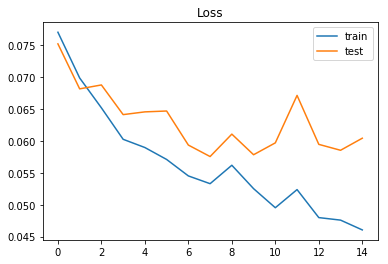

In [95]:
plt.title('Loss')
plt.plot(logloss_tr, label='train')
plt.plot(logloss_test, label='test')
plt.legend()

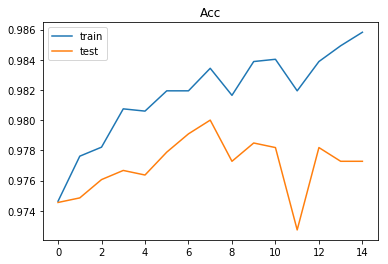

In [96]:
plt.title('Acc')
plt.plot(acc_tr, label='train')
plt.plot(acc_test, label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [38]:
X_no_lab = test_no_lables['data']
X_no_lab = X_no_lab/255

Y_pred = predict_probability(X_no_lab, w)

with open('solution 9 04.10.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(test_no_lables['data'])):
        print(i, Y_pred[i], sep=',', file=fout)

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Пишите тему письм в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb
- Обязательно указывайте ваш ник на kaggle